# Import Libraries

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [100]:
df = pd.read_csv('titanic_data.csv')

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Types of Features :
#### Categorical :- Sex,Embarked
#### Continuous :- Age,Fare
#### Discrete :- SibSp,Parch
#### Alphanumeric :- Cabin

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Values Analysis

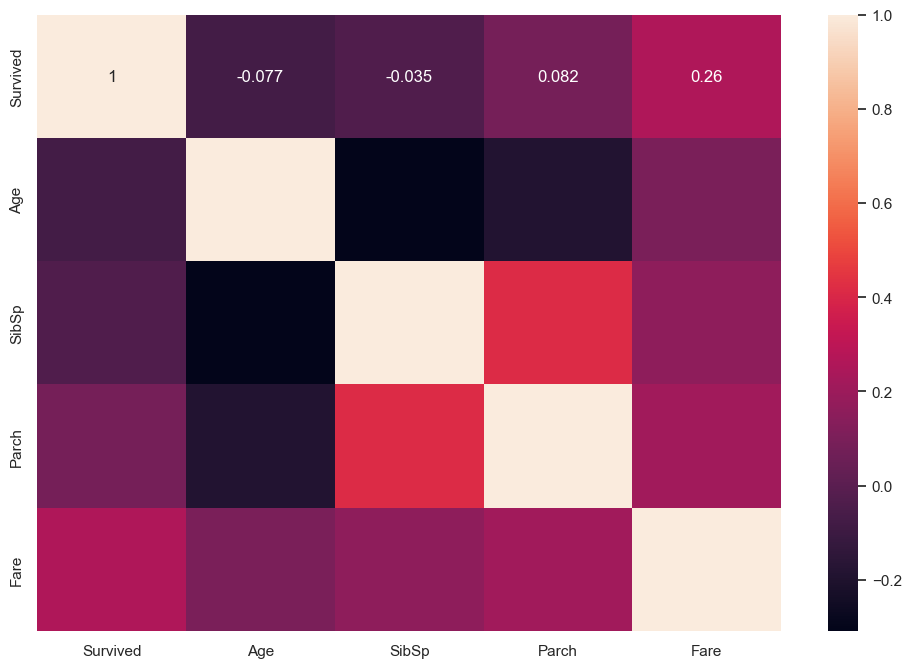

In [112]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df[['Survived','Age','SibSp','Parch','Fare']].corr(),annot=True)

## <font color='green'>sibsp - Number of siblings/spouses abroad the Titanic<font/>

In [115]:
df['SibSp'].nunique()

7

In [117]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

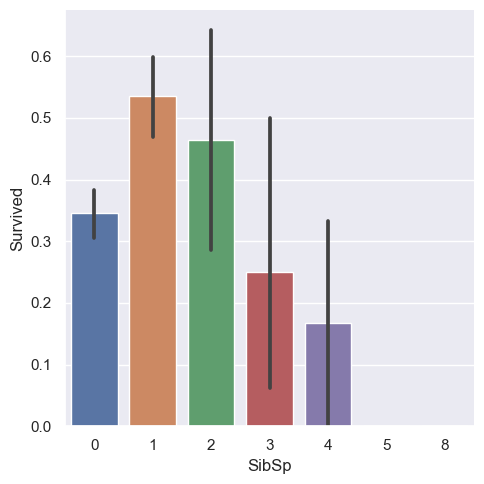

In [119]:
sns.catplot(x = 'SibSp',y = 'Survived',data=df,kind='bar')

##  Age

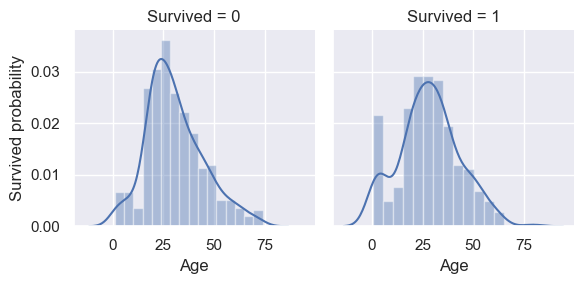

In [121]:
age_visual = sns.FacetGrid(df,col = 'Survived')
age_visual = age_visual.map(sns.distplot,'Age').set_ylabels('Survived probability')

## Sex

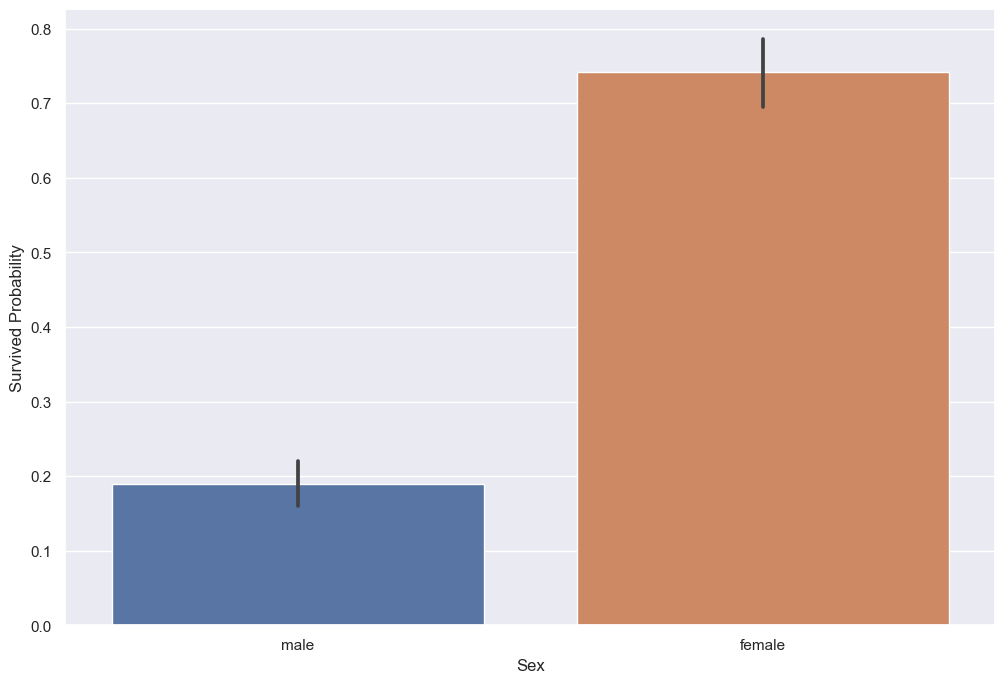

In [125]:
sex_plot = sns.barplot(x ='Sex',y = 'Survived',data=df).set_ylabel('Survived Probability')

In [127]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## Pclass

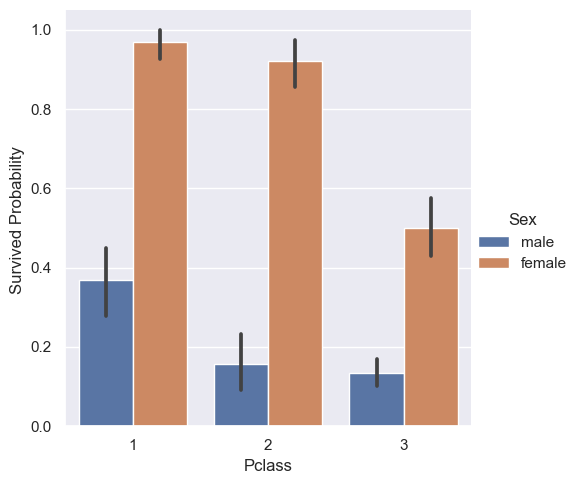

In [130]:
sns.catplot(x = 'Pclass',y = 'Survived',data=df,kind='bar',hue = 'Sex').set_ylabels('Survived Probability ')

## Embarked

In [134]:
df['Embarked'].isnull().sum()

2

In [136]:
df['Embarked'] = df['Embarked'].fillna('S')

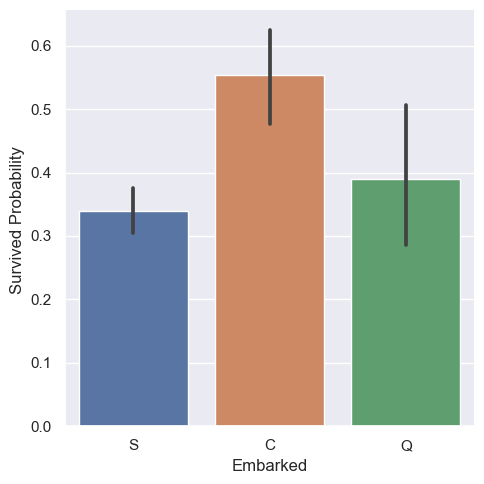

In [138]:
sns.catplot(x = 'Embarked',y = 'Survived',data=df,kind='bar').set_ylabels('Survived Probability ')

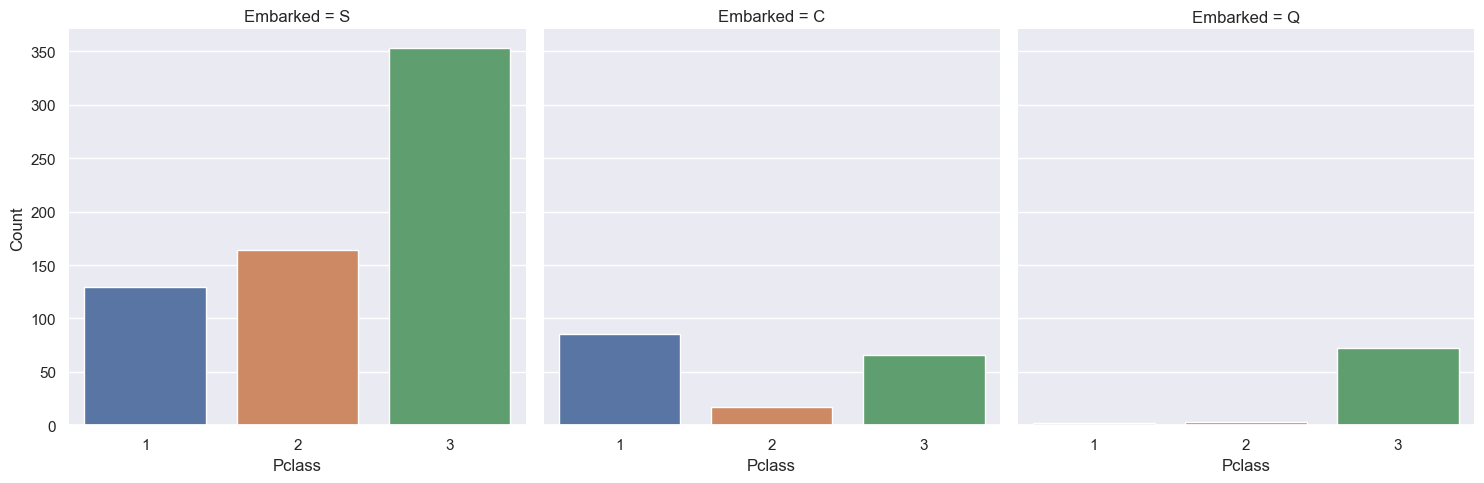

In [154]:
explore_emb = sns.catplot(x='Pclass',col='Embarked',data=df,kind='count')
explore_emb.despine(left='True')
explore_emb = explore_emb.set_ylabels('Count')

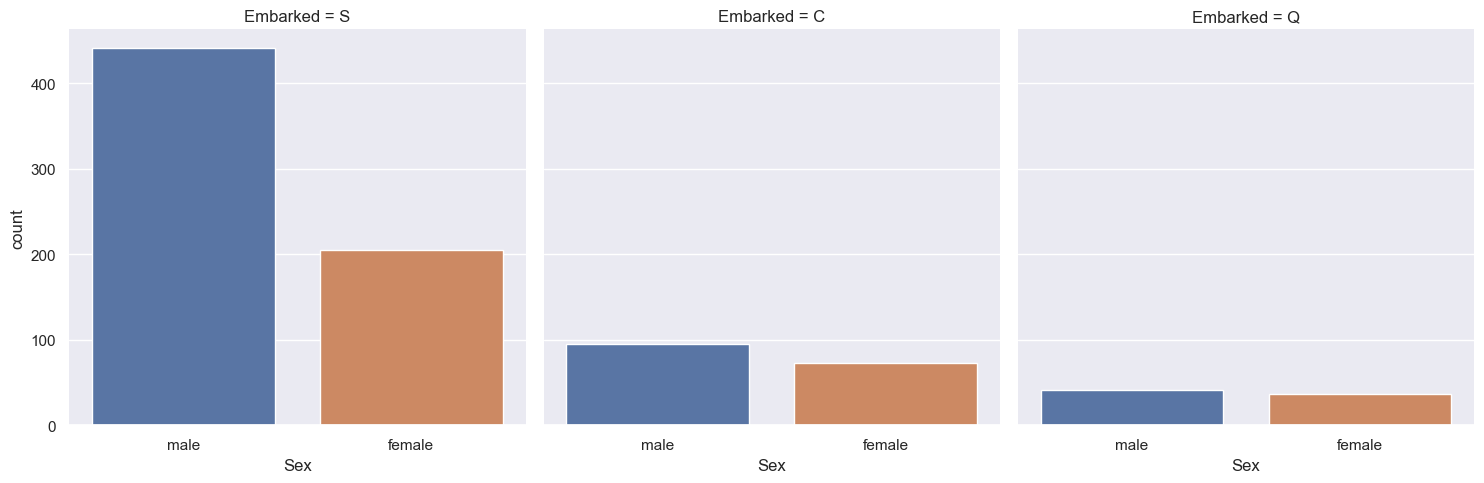

In [156]:
sex_emb = sns.catplot(x='Sex',col='Embarked',data=df,kind='count')
sex_emb.despine(left='True')
sex_emb = explore_emb.set_ylabels('Count')

# Preparing Data

In [161]:
df = pd.read_csv('titanic_data.csv')

In [163]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
mean = df['Age'].mean()
std = df['Age'].std()
is_null = df['Age'].isnull().sum()

In [175]:
print(mean,',',std,',',is_null)

29.69911764705882 , 14.526497332334044 , 177


In [177]:
rand_age = np.random.randint(mean-std,mean+std,size=is_null)

In [181]:
type(rand_age)

numpy.ndarray

In [191]:
a = df['Age'].copy()
a[np.isnan(a)] = rand_age
df['Age'] = a

In [195]:
df['Age'].isnull().sum()

0

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
df['Embarked'] = df['Embarked'].fillna('S')

In [203]:
drop_col = ['PassengerId','Cabin','Ticket','Name']
df.drop(drop_col,axis=1,inplace=True)

In [205]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [207]:
gender = {'male':0,'female':1}
df['Sex'] = df['Sex'].map(gender)

In [211]:
port = {'S':0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(port)

In [228]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Splitting the data

In [241]:
x = df.drop(df.columns[[0]],axis=1)

In [243]:
y = df['Survived']

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

## Scaling

In [247]:
from sklearn.preprocessing import StandardScaler

In [249]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Classification

In [257]:
logreg = LogisticRegression()
svc_class = SVC()
decisiontree = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)
random_for = RandomForestClassifier(n_estimators=1000)

In [259]:
logreg.fit(x_train,y_train)
svc_class.fit(x_train,y_train)
decisiontree.fit(x_train,y_train)
knn.fit(x_train,y_train)
random_for.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [261]:
logreg_pred = logreg.predict(x_test)
svc_class_pred = svc_class.predict(x_test)
decisiontree_pred = decisiontree.predict(x_test)
knn_pred = knn.predict(x_test)
random_for_pred = random_for.predict(x_test)


In [263]:
from sklearn.metrics import accuracy_score

In [265]:
logreg_score = accuracy_score(y_test,logreg_pred)
svc_class_score = accuracy_score(y_test,svc_class_pred)
decisiontree_score = accuracy_score(y_test,decisiontree_pred)
knn_score = accuracy_score(y_test,knn_pred)
random_for_score = accuracy_score(y_test,random_for_pred)

In [267]:
print('Logistic Regreesion : ',round(logreg_score*100,2))
print('Support Vector : ',round(svc_class_score*100,2))
print('Decision Tree : ',round(decisiontree_score *100,2))
print('K-NN Classifier : ',round(knn_score*100,2))
print('Random Forest : ',round(random_for_score*100,2))

Logistic Regreesion :  82.09
Support Vector :  84.7
Decision Tree :  79.48
K-NN Classifier :  83.96
Random Forest :  81.34
